##Setting up and Importing libs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [3]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [4]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as stats
import shap

import optuna
from optuna.samplers import TPESampler

In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science/Basic ML Practice/Classification/test(academic).csv')
train_data = pd.read_csv('/content/drive/MyDrive/Data Science/Basic ML Practice/Classification/train(academic).csv')
original_data = pd.read_csv('/content/drive/MyDrive/Data Science/Basic ML Practice/Classification/data.csv')

In [6]:
pd.options.display.float_format = "{:.4f}".format

In [7]:
train_data

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200,Graduate
1,1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200,Dropout
2,2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200,Dropout
3,3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200,Enrolled
4,4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0000,1,19,1,7,5,116.5000,1,0,0,1,0,1,18,0,0,6,9,6,10.6667,0,0,6,8,5,10.6000,0,13.9000,-0.3000,0.7900,Graduate
76514,76514,1,1,6,9254,1,1,125.0000,1,1,38,4,9,131.6000,1,0,0,1,0,0,19,0,0,6,22,4,13.0000,0,0,6,9,6,13.8750,0,9.4000,-0.8000,-3.1200,Graduate
76515,76515,5,17,1,9085,1,1,138.0000,1,37,37,9,10,123.3000,1,0,0,1,0,0,19,0,0,5,13,4,12.5000,2,0,5,8,5,11.4000,1,9.4000,-0.8000,-3.1200,Enrolled
76516,76516,1,1,3,9070,1,1,136.0000,1,38,37,5,9,124.8000,1,0,0,1,0,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,7.6000,2.6000,0.3200,Dropout


#Handle Original data

In [8]:
original_data.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)
original_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0000,1,19,12,5,9,127.3000,1,0,0,1,1,0,20,0,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0,10.8000,1.4000,1.7400,Dropout
1,1,15,1,9254,1,1,160.0000,1,1,3,3,3,142.5000,1,0,0,0,1,0,19,0,0,6,6,6,14.0000,0,0,6,6,6,13.6667,0,13.9000,-0.3000,0.7900,Graduate
2,1,1,5,9070,1,1,122.0000,1,37,37,9,9,124.8000,1,0,0,0,1,0,19,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,10.8000,1.4000,1.7400,Dropout
3,1,17,2,9773,1,1,122.0000,1,38,37,5,3,119.6000,1,0,0,1,0,0,20,0,0,6,8,6,13.4286,0,0,6,10,5,12.4000,0,9.4000,-0.8000,-3.1200,Graduate
4,2,39,1,8014,0,1,100.0000,1,37,38,9,9,141.5000,0,0,0,1,0,0,45,0,0,6,9,5,12.3333,0,0,6,6,6,13.0000,0,13.9000,-0.3000,0.7900,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600,Graduate
4420,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200,Dropout
4421,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900,Dropout
4422,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200,Graduate


In [9]:
train_data = pd.concat([train_data.drop(['id'], axis=1), original_data],ignore_index=True)
train_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200,Graduate
1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200,Dropout
2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200,Dropout
3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200,Enrolled
4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600,Graduate
80938,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200,Dropout
80939,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900,Dropout
80940,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200,Graduate


#EDA

**Unique items**

In [10]:
for i in train_data.columns:
  print(f'{i} has {train_data[i].nunique()} unique items')

Marital status has 6 unique items
Application mode has 23 unique items
Application order has 8 unique items
Course has 19 unique items
Daytime/evening attendance has 2 unique items
Previous qualification has 21 unique items
Previous qualification (grade) has 114 unique items
Nacionality has 21 unique items
Mother's qualification has 35 unique items
Father's qualification has 39 unique items
Mother's occupation has 40 unique items
Father's occupation has 56 unique items
Admission grade has 669 unique items
Displaced has 2 unique items
Educational special needs has 2 unique items
Debtor has 2 unique items
Tuition fees up to date has 2 unique items
Gender has 2 unique items
Scholarship holder has 2 unique items
Age at enrollment has 46 unique items
International has 2 unique items
Curricular units 1st sem (credited) has 21 unique items
Curricular units 1st sem (enrolled) has 24 unique items
Curricular units 1st sem (evaluations) has 36 unique items
Curricular units 1st sem (approved) has 

**Missing values** (no missing values)

In [11]:
train_data.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


**Data type for each column**

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80942 entries, 0 to 80941
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  80942 non-null  int64  
 1   Application mode                                80942 non-null  int64  
 2   Application order                               80942 non-null  int64  
 3   Course                                          80942 non-null  int64  
 4   Daytime/evening attendance                      80942 non-null  int64  
 5   Previous qualification                          80942 non-null  int64  
 6   Previous qualification (grade)                  80942 non-null  float64
 7   Nacionality                                     80942 non-null  int64  
 8   Mother's qualification                          80942 non-null  int64  
 9   Father's qualification                 

**Distribution of target column**

<Axes: xlabel='Target', ylabel='count'>

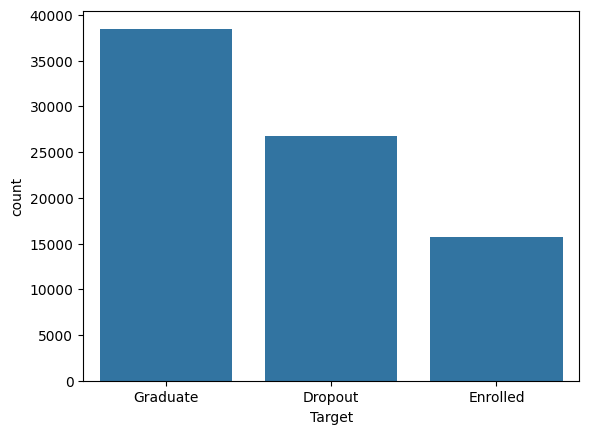

In [13]:
sns.countplot(data= train_data, x = 'Target')

***slightly imbalanced***

**Distribution and Boxplot for numerical variables**


In [14]:
X = train_data.drop(columns='Target')
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200
1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200
2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200
3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200
4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600
80938,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200
80939,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900
80940,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200


Text(0.5, 0.98, 'Visualizing Continuous Columns')

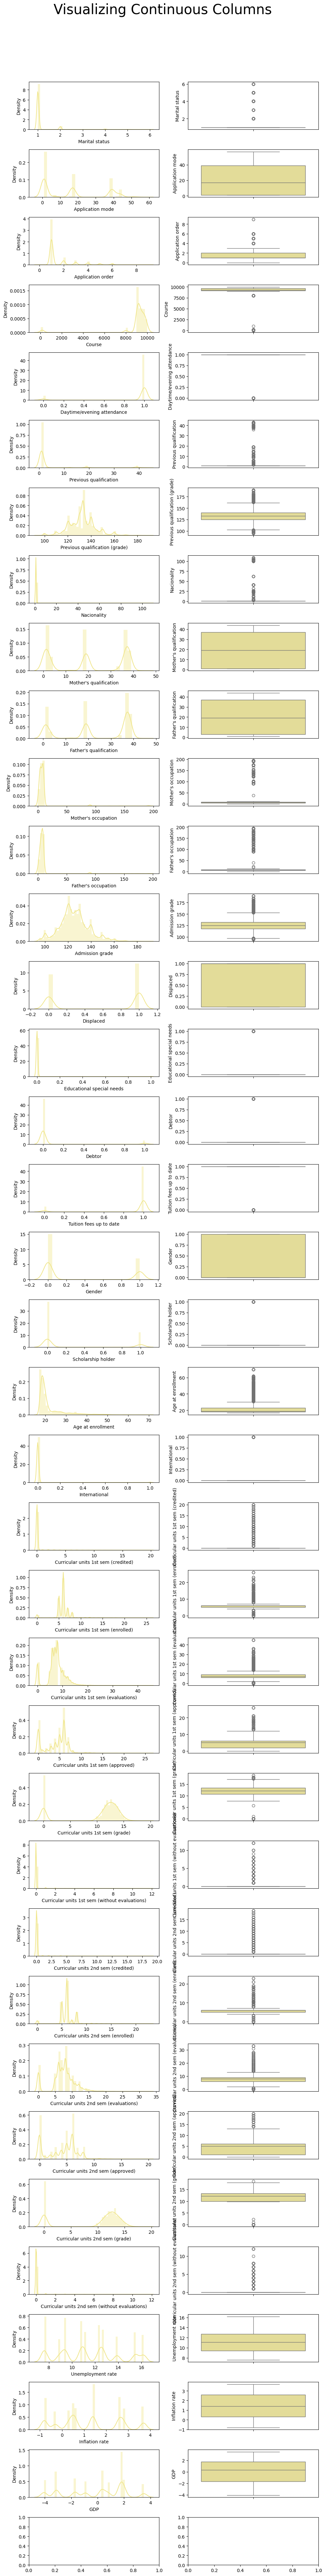

In [15]:
fig, ax = plt.subplots(37,2,figsize=(10,80))
for index,i in enumerate(X.columns):
    sns.distplot(X[i],ax=ax[index,0], color = 'khaki')
    sns.boxplot(X[i],ax=ax[index,1], color = 'khaki')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

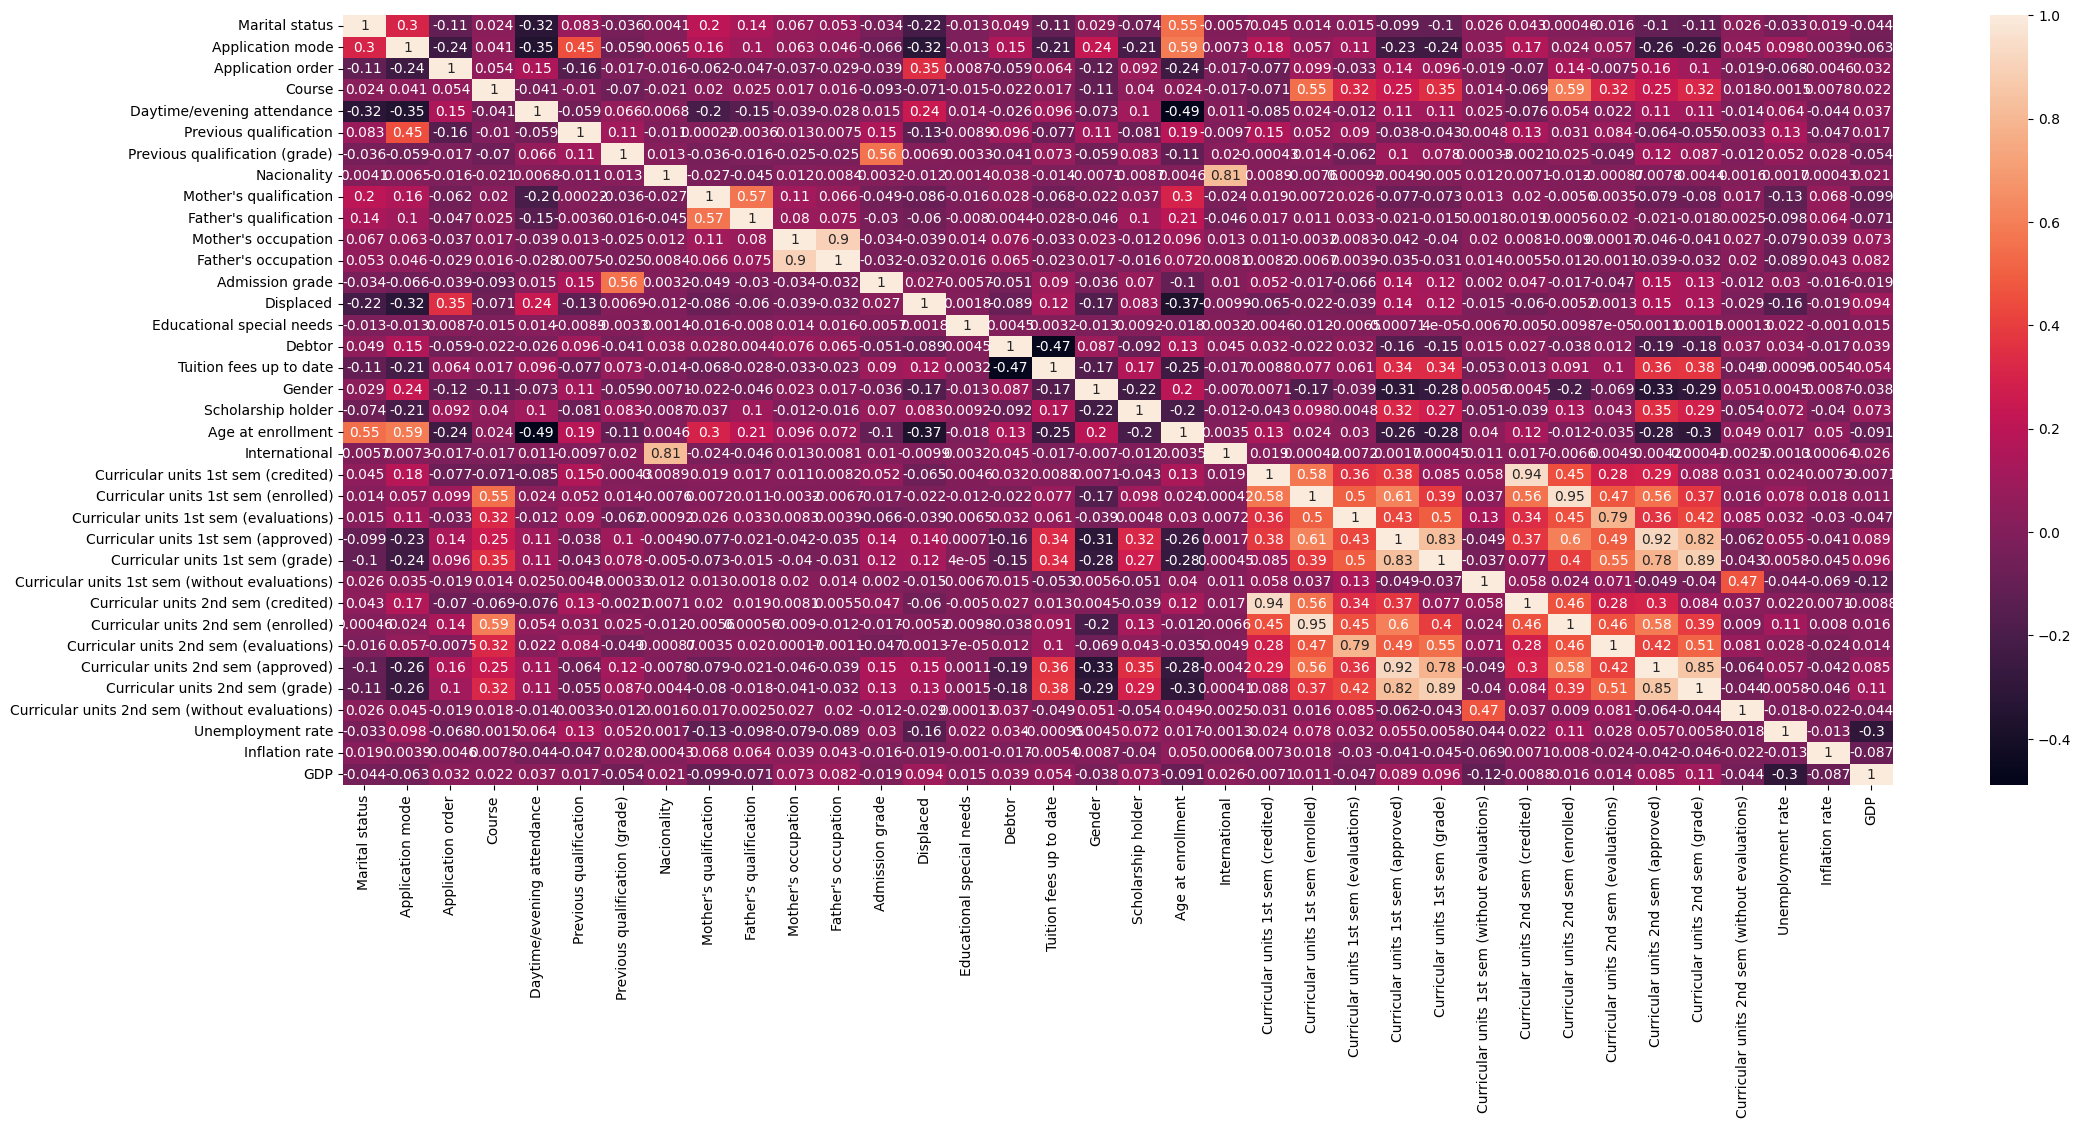

In [16]:
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

Mutual Info

In [17]:
from sklearn.feature_selection import mutual_info_classif

y_sampled = train_data.Target
mutual_df = train_data.drop(['Target'], axis=1)

mutual_info = mutual_info_classif(mutual_df, y_sampled, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Curricular units 2nd sem (approved),0.469524
Curricular units 2nd sem (grade),0.404473
Curricular units 1st sem (approved),0.396022
Curricular units 1st sem (grade),0.353706
Curricular units 2nd sem (evaluations),0.185980
Curricular units 1st sem (evaluations),0.181855
Course,0.113924
Tuition fees up to date,0.108806
Admission grade,0.106779
Age at enrollment,0.096224


**Multicollinearity detected: remove either Nationality and international, remove either grade or approved, and combine both semester grade into 1 (for each category such as credited, enrolled, evaluations, approved, without evaluation)**

#Data Preprocessing

There is no missing data and all data are numerical (except for target)

##Feature engineering

In [18]:
train_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200,Graduate
1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200,Dropout
2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200,Dropout
3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200,Enrolled
4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600,Graduate
80938,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200,Dropout
80939,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900,Dropout
80940,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200,Graduate


In [19]:
# X = train_data.drop(columns = ['Marital status','Daytime/evening attendance','Previous qualification','Nacionality','Educational special needs','International','Curricular units 1st sem (credited)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (without evaluations)', 'Target'])
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200
1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200
2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200
3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200
4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600
80938,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200
80939,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900
80940,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200


In [20]:
# X['Curricular units (credited)'] = X['Curricular units 1st sem (credited)'] + X['Curricular units 2nd sem (credited)']
# X['Curricular units (enrolled)'] = X['Curricular units 1st sem (enrolled)'] + X['Curricular units 2nd sem (enrolled)']
# X['Curricular units (evaluations)'] = X['Curricular units 1st sem (evaluations)'] + X['Curricular units 2nd sem (evaluations)']
# X['Curricular units (grade)'] =  (X['Curricular units 1st sem (grade)'] + X['Curricular units 2nd sem (grade)']) /2
# X['Curricular units (without evaluations)'] = X['Curricular units 1st sem (without evaluations)'] + X['Curricular units 2nd sem (without evaluations)']
# X.drop(columns =['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], inplace = True)
# X

In [21]:
# plt.figure(figsize=(25,10))
# sns.heatmap(X.corr(),annot=True)
# plt.show()

In [22]:
# X.drop(columns = ["Mother's occupation"], inplace = True)
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0000,1,1,19,5,5,122.6000,0,0,0,1,0,1,18,0,0,6,6,6,14.5000,0,0,6,7,6,12.4286,0,11.1000,0.6000,2.0200
1,1,17,1,9238,1,1,125.0000,1,19,19,9,9,119.8000,1,0,0,1,0,0,18,0,0,6,8,4,11.6000,0,0,6,9,0,0.0000,0,11.1000,0.6000,2.0200
2,1,17,2,9254,1,1,137.0000,1,3,19,2,3,144.7000,0,0,0,1,1,0,18,0,0,6,0,0,0.0000,0,0,6,0,0,0.0000,0,16.2000,0.3000,-0.9200
3,1,1,3,9500,1,1,131.0000,1,19,3,3,2,126.1000,1,0,0,1,0,1,18,0,0,7,9,7,12.5913,0,0,8,11,7,12.8200,0,11.1000,0.6000,2.0200
4,1,1,2,9500,1,1,132.0000,1,19,37,4,9,120.1000,1,0,0,1,0,0,18,0,0,7,12,6,12.9333,0,0,7,12,6,12.9333,0,7.6000,2.6000,0.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0000,1,1,1,5,4,122.2000,0,0,0,1,1,0,19,0,0,6,7,5,13.6000,0,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600
80938,1,1,2,9773,1,1,120.0000,105,1,1,9,9,119.0000,1,0,1,0,0,0,18,1,0,6,6,6,12.0000,0,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200
80939,1,1,1,9500,1,1,154.0000,1,37,37,9,9,149.5000,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900
80940,1,1,1,9147,1,1,180.0000,1,37,37,7,4,153.8000,1,0,0,1,0,1,20,0,0,5,5,5,13.8000,0,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200


##Splitting into Training/Validation/Test

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Target'] = label_encoder.fit_transform(train_data['Target'])
train_data['Target']

,Target
0,2
1,0
2,0
3,1
4,2
...,...
80937,2
80938,0
80939,0
80940,2


In [24]:
Y = train_data['Target']
Y

,Target
0,2
1,0
2,0
3,1
4,2
...,...
80937,2
80938,0
80939,0
80940,2


In [25]:
# X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

Balance dataset can be split randomly but since the distribution of the target is imbalanced, its better to use stratified Kfold to split the training/validation sets

##Normalization/Standardization

#Modeling

##Finding a baseline model

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
lsvc = LinearSVC()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
nb = GaussianNB()
base_xgb = XGBClassifier()
lgbm = LGBMClassifier()



In [27]:
cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)


In [28]:
from statistics import mean, stdev

def compute(model):
    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        lst_accu_stratified.append(model.score(X_test, Y_test))

    accuracy = model.score(X_train, Y_train)
    max_val_score = max(lst_accu_stratified)
    min_val_score = min(lst_accu_stratified)
    mean_val_score = mean(lst_accu_stratified)
    std = stdev(lst_accu_stratified)

    hashmap[str(model)]=([accuracy, mean_val_score, max_val_score, min_val_score, std])

In [31]:
# simpler version
def compute1(model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    hashmap[str(model)]=(score)

In [ ]:
clf = [lgbm, base_xgb, rfc, lr, dtc, lsvc, knn, gbc, nb]
hashmap = {}
for i in clf:
  compute(i)

NameError: name 'lgbm' is not defined

In [ ]:
score = pd.DataFrame(hashmap, index = [0])
score = score.transpose()
score.columns=['Training_Accuracy']
score = score.sort_values('Training_Accuracy',ascending=False)
score

,Training_Accuracy
LGBMClassifier(),0.8346
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, objective='multi:softprob', ...)",0.8333
GradientBoostingClassifier(),0.8305
RandomForestClassifier(),0.8289
GaussianNB(),0.7820
DecisionTreeClassifier(),0.7469
LogisticRegression(),0.7445
LinearSVC(),0.7437
KNeighborsClassifier(),0.7366


In [ ]:
score = pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['Training_Accuracy', 'Mean_val', 'Max_val','Min_val','Std']
score = score.sort_values('Mean_val',ascending=False)
score

,Training_Accuracy,Mean_val,Max_val,Min_val,Std
LGBMClassifier(),0.8483,0.8293,0.8321,0.8275,0.0020
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, objective='multi:softprob', ...)",0.8801,0.8290,0.8304,0.8265,0.0016
GradientBoostingClassifier(),0.8277,0.8249,0.8269,0.8225,0.0020
RandomForestClassifier(),0.9998,0.8235,0.8244,0.8219,0.0011
GaussianNB(),0.7625,0.7618,0.7641,0.7583,0.0021
DecisionTreeClassifier(),0.9998,0.7384,0.7423,0.7351,0.0028
LogisticRegression(),0.7315,0.7323,0.7351,0.7283,0.0027
KNeighborsClassifier(),0.8076,0.7317,0.7336,0.7299,0.0014
LinearSVC(),0.6848,0.6861,0.7428,0.5329,0.0889


NOTE: Training accuracy reflects performance on training data while mean_val reflects on unseen data

## Feature Importance

In [ ]:
from matplotlib import pyplot

def checking_feature_imp(model):
  for i,v in enumerate (model.feature_importances_):
    print(f'{X.columns[i]}: {v: 5f}')
  pyplot.bar([x for x in range(1, len(model.feature_importances_)+1)], model.feature_importances_)
  pyplot.show()

LGBMClassifier()
Marital status:  41.000000
Application mode:  220.000000
Application order:  135.000000
Course:  554.000000
Daytime/evening attendance:  51.000000
Previous qualification:  58.000000
Previous qualification (grade):  451.000000
Nacionality:  44.000000
Mother's qualification:  173.000000
Father's qualification:  211.000000
Mother's occupation:  320.000000
Father's occupation:  395.000000
Admission grade:  792.000000
Displaced:  84.000000
Educational special needs:  5.000000
Debtor:  114.000000
Tuition fees up to date:  270.000000
Gender:  115.000000
Scholarship holder:  259.000000
Age at enrollment:  413.000000
International:  1.000000
Curricular units 1st sem (credited):  67.000000
Curricular units 1st sem (enrolled):  178.000000
Curricular units 1st sem (evaluations):  318.000000
Curricular units 1st sem (approved):  415.000000
Curricular units 1st sem (grade):  577.000000
Curricular units 1st sem (without evaluations):  51.000000
Curricular units 2nd sem (credited):  5

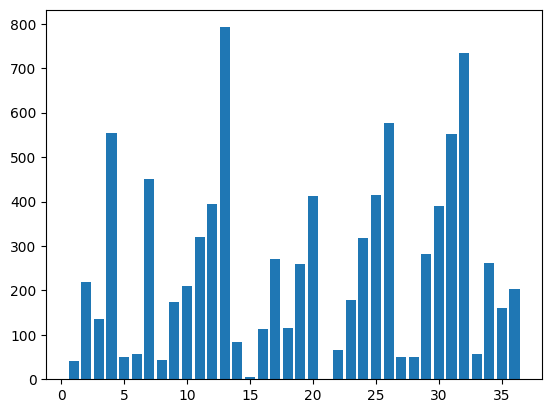


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Marital status:  0.006240
Application mode:  0.008392
Application order:  0.006394
Course:  0.011636
Daytime/evening attendance:  0.009913
Previous qualification:  0.006676
Previous qualification (grade):  0.006745
Nacionality:  0.0

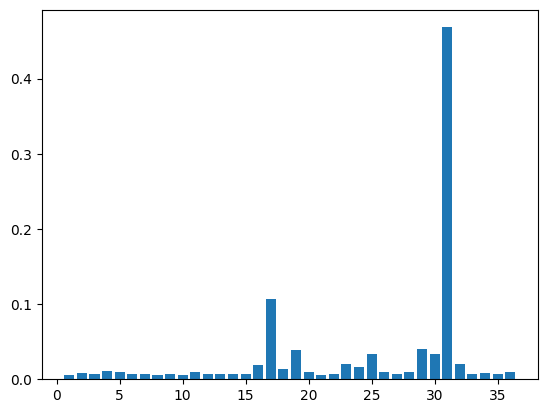


GradientBoostingClassifier()
Marital status:  0.000177
Application mode:  0.001709
Application order:  0.000174
Course:  0.005871
Daytime/evening attendance:  0.000441
Previous qualification:  0.000152
Previous qualification (grade):  0.000957
Nacionality:  0.000104
Mother's qualification:  0.000988
Father's qualification:  0.000328
Mother's occupation:  0.002698
Father's occupation:  0.001645
Admission grade:  0.003066
Displaced:  0.000363
Educational special needs:  0.000007
Debtor:  0.003151
Tuition fees up to date:  0.047542
Gender:  0.001758
Scholarship holder:  0.016129
Age at enrollment:  0.007317
International:  0.000000
Curricular units 1st sem (credited):  0.000440
Curricular units 1st sem (enrolled):  0.007811
Curricular units 1st sem (evaluations):  0.024957
Curricular units 1st sem (approved):  0.038624
Curricular units 1st sem (grade):  0.007356
Curricular units 1st sem (without evaluations):  0.000160
Curricular units 2nd sem (credited):  0.000615
Curricular units 2nd s

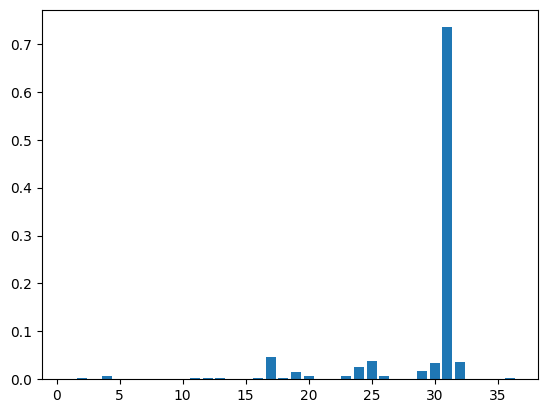

In [ ]:
well_performed_clf = [lgbm, base_xgb, gbc]
for each_clf in well_performed_clf:
  print(each_clf)
  checking_feature_imp(each_clf)
  print()

Rework feature engineering and possibly normalizing

##Tuning baseline model


###Hyperparams searching with Optuna

**Simpler Version:**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

**Complicated Version:**

In [29]:
def tune(model):
  lst_accu_stratified = []

  for train_index, test_index in cv.split(X_train, Y_train):
      X_train, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
      Y_train, Y_val = Y_train.iloc[train_index], Y_train.iloc[test_index]
      model.fit(X_train, Y_train)
      y_pred = model.predict(X_val)
      accuracy = accuracy_score(Y_val, y_pred)
      lst_accu_stratified.append(accuracy)

  mean_val_score = mean(lst_accu_stratified)
  return mean_val_score, model

####GradientBoosting (Omitted)

In [36]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create and train the model
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    accuracy, _ = tune(model)
    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_test)
    # accuracy = accuracy_score(Y_test, y_pred)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best parameters found: ', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-09-04 08:12:57,658] A new study created in memory with name: no-name-0bcd5e31-d159-4e04-972f-88fbbd26d858


NameError: name 'objective' is not defined

In [ ]:
best_params_gbc = {'n_estimators': 166, 'learning_rate': 0.0838647132457612, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 5}
optimized_gbc = GradientBoostingClassifier(**best_params_gbc)

####LGBM

In [30]:
from lightgbm import log_evaluation, early_stopping
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'multiclass',  # For multi-class classification
        'metric': 'multi_logloss',  # Metric for evaluation in multi-class classification
        'num_class': 3,
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 400)
    }

    # Create and train the LightGBM model
    model = LGBMClassifier(**param)

    lst_accu_stratified = []

    for train_index, test_index in cv.split(X_train, Y_train):
        X_train, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        Y_train, Y_val = Y_train.iloc[train_index], Y_train.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)],  callbacks=[early_stopping(stopping_rounds=50, verbose=False)])
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(Y_val, y_pred)
        lst_accu_stratified.append(accuracy)

    mean_val_score = mean(lst_accu_stratified)

    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_val)
    # accuracy = accuracy_score(Y_val, y_pred)

    return mean_val_score

In [31]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-09-18 07:26:13,531] A new study created in memory with name: no-name-64734463-bb14-4d24-a722-7df6443857ab
[I 2024-09-18 07:30:10,654] Trial 0 finished with value: 0.8308047469230183 and parameters: {'lambda_l1': 7.665918519317082, 'lambda_l2': 5.350722683615945, 'num_leaves': 216, 'feature_fraction': 0.9683925566940588, 'bagging_fraction': 0.975260184643981, 'bagging_freq': 7, 'min_child_samples': 16, 'learning_rate': 0.033965490340475385, 'n_estimators': 386}. Best is trial 0 with value: 0.8308047469230183.
[I 2024-09-18 07:32:13,006] Trial 1 finished with value: 0.8298287435316481 and parameters: {'lambda_l1': 4.79152879330798, 'lambda_l2': 9.080963388534576, 'num_leaves': 144, 'feature_fraction': 0.9620936509129518, 'bagging_fraction': 0.6865045339598148, 'bagging_freq': 2, 'min_child_samples': 63, 'learning_rate': 0.061670358783762404, 'n_estimators': 240}. Best is trial 0 with value: 0.8308047469230183.
[I 2024-09-18 07:33:25,548] Trial 2 finished with value: 0.83095299878

Best hyperparameters: {'lambda_l1': 6.922793148140732, 'lambda_l2': 7.773529800886675, 'num_leaves': 39, 'feature_fraction': 0.5724220950571379, 'bagging_fraction': 0.8467646307071159, 'bagging_freq': 7, 'min_child_samples': 23, 'learning_rate': 0.0748863913631938, 'n_estimators': 346}
Best accuracy:  0.8322625971079851


In [40]:
best_params_lgbm = {'lambda_l1': 6.922793148140732, 'lambda_l2': 7.773529800886675, 'num_leaves': 39, 'feature_fraction': 0.5724220950571379, 'bagging_fraction': 0.8467646307071159, 'bagging_freq': 7, 'min_child_samples': 23, 'learning_rate': 0.0748863913631938, 'n_estimators': 346}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)
optimized_lgbm.fit(X_train, Y_train)
preds = optimized_lgbm.predict(X_test)
accuracy = accuracy_score(Y_test, preds)
print(accuracy)

[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.773529800886675
[LightGBM] [Warning] lambda_l1 is set=6.922793148140732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.922793148140732
[LightGBM] [Warning] bagging_fraction is set=0.8467646307071159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467646307071159
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Curre

with all data

In [ ]:
best_params_lgbm = {'n_estimators': 139, 'feature_fraction': 0.6508993807717574, 'learning_rate': 0.10572561212529465, 'max_depth': 6, 'num_leaves': 573, 'min_data_in_leaf': 77, 'lambda_l1': 0.009399635106396737, 'lambda_l2': 0.0810142822862634, 'min_gain_to_split': 1.3076875036928457, 'bagging_fraction': 0.8821347385323065, 'bagging_freq': 1}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)

####XGB

In [32]:
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'multi:softmax',  # For multi-class classification
        'eval_metric': 'mlogloss',     # Metric for evaluation in multi-class classification
        'num_class': 3,      # Replace with the number of classes in your dataset
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 10.0)
    }

    # Create and train the XGBoost model
    model = XGBClassifier(**param)
    accuracy, _ = tune(model)
    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_val)
    # accuracy = accuracy_score(Y_val, y_pred)

    return accuracy

In [33]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-09-18 10:17:09,170] A new study created in memory with name: no-name-d2e54217-2871-4558-b722-4d9c46833c36
[I 2024-09-18 10:18:07,691] Trial 0 finished with value: 0.8228978551986363 and parameters: {'lambda': 4.155124842636019, 'alpha': 9.369040585221418, 'colsample_bytree': 0.6684608777397631, 'subsample': 0.4705962147797203, 'learning_rate': 0.09614293934763427, 'n_estimators': 489, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 7.954168800407668}. Best is trial 0 with value: 0.8228978551986363.
[I 2024-09-18 10:18:31,210] Trial 1 finished with value: 0.8169429969676671 and parameters: {'lambda': 6.430032148488266, 'alpha': 0.8827307857862932, 'colsample_bytree': 0.4896001605908017, 'subsample': 0.4156374227511003, 'learning_rate': 0.015588659244513357, 'n_estimators': 122, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 7.707102550231398}. Best is trial 0 with value: 0.8228978551986363.
[I 2024-09-18 10:18:55,047] Trial 2 finished with value: 0.8182031576502197 and paramet

Best hyperparameters: {'lambda': 0.7587019782767757, 'alpha': 0.3355037612233174, 'colsample_bytree': 0.41743943865515004, 'subsample': 0.9728907624585776, 'learning_rate': 0.06811722970327601, 'n_estimators': 383, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.004419940617689966}
Best accuracy:  0.8324108459189061


In [45]:
# Best accuracy:  0.8324108459189061
best_param_xgb = {'lambda': 0.7587019782767757, 'alpha': 0.3355037612233174, 'colsample_bytree': 0.41743943865515004, 'subsample': 0.9728907624585776, 'learning_rate': 0.06811722970327601, 'n_estimators': 383, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.004419940617689966}
optimized_xgb = XGBClassifier(**best_param_xgb)
optimized_xgb.fit(X_train, Y_train)
preds = optimized_xgb.predict(X_test)
accuracy = accuracy_score(Y_test, preds)
print(accuracy)

0.8378632140739276


with all data

In [ ]:
best_param_xgb = {'eta': 0.09071933573126058, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.00022144451992830113, 'subsample': 0.9086569914470117, 'colsample_bytree': 0.5572392410274065, 'alpha': 0.04848584428871549}
optimized_xgb = XGBClassifier(**best_param_xgb)

##Ensemble Learning

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

###Voting Method

In [51]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

ensemble_models = [('lgb', optimized_lgbm),
   ('xgb', optimized_xgb)]

voting_model = VotingClassifier(estimators= ensemble_models, voting= 'soft')
voting_model.fit(X_train, Y_train)

[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.773529800886675
[LightGBM] [Warning] lambda_l1 is set=6.922793148140732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.922793148140732
[LightGBM] [Warning] bagging_fraction is set=0.8467646307071159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467646307071159
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Curre

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.8467646307071159,
                                             bagging_freq=7,
                                             feature_fraction=0.5724220950571379,
                                             lambda_l1=6.922793148140732,
                                             lambda_l2=7.773529800886675,
                                             learning_rate=0.0748863913631938,
                                             min_child_samples=23,
                                             n_estimators=346, num_leaves=39)),
                             ('xgb',
                              XGBClassifier(alpha=0.3355037612233174,
                                            base_score=None, booster...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lambda=0.7587019782767757,
                                            learning_rate=0.06811722970327601,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=9,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=383, n_jobs=None, ...))],
                 voting='soft')

In [52]:
voting_model_val_preds = voting_model.predict(X_test)
voting_model_val_accuracy = accuracy_score(Y_test, voting_model_val_preds)
print(voting_model_val_accuracy)

[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.773529800886675
[LightGBM] [Warning] lambda_l1 is set=6.922793148140732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.922793148140732
[LightGBM] [Warning] bagging_fraction is set=0.8467646307071159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467646307071159
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
0.8376655465507017


###Stacking Method

In [53]:
from sklearn.ensemble import StackingClassifier
final_estimator = LogisticRegression()

estimators = [
    ('lgb', optimized_lgbm),
    ('xgb', optimized_xgb)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking model
stacking_model.fit(X_train, Y_train)

# Evaluate the model
accuracy = stacking_model.score(X_test, Y_test)
print(f'Accuracy: {accuracy}')

[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.773529800886675
[LightGBM] [Warning] lambda_l1 is set=6.922793148140732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.922793148140732
[LightGBM] [Warning] bagging_fraction is set=0.8467646307071159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467646307071159
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Curre

#Evaluation and Validation (Omitted)

##Validation

**Stratified K-fold validation**

In [ ]:
# cv_scores = cross_val_score(gbc, X_train, Y_train, cv=5, scoring='accuracy')

# print(f'Cross-Validation Accuracy Scores: {cv_scores}')
# print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

##Evaluation with Confusion Matrix and other metrics

In [ ]:
# Y_pred = optimized_gbc.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# precision = precision_score(Y_test, Y_pred, average='weighted')
# recall = recall_score(Y_test, Y_pred, average='weighted')
# f1 = f1_score(Y_test, Y_pred, average='weighted')

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')

In [ ]:
# conf_matrix = confusion_matrix(Y_test, Y_pred)

# # Plot the confusion matrix
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

#Final Solutions

In [60]:
# final_test = test_data.drop(columns = ['Marital status','Daytime/evening attendance','Previous qualification','Nacionality','Educational special needs','International','Curricular units 1st sem (credited)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (without evaluations)',"Mother's occupation"])
final_test = test_data

In [61]:
solution = voting_model.predict(final_test.drop(columns =['id']))
solution

[LightGBM] [Warning] feature_fraction is set=0.5724220950571379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5724220950571379
[LightGBM] [Warning] lambda_l2 is set=7.773529800886675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.773529800886675
[LightGBM] [Warning] lambda_l1 is set=6.922793148140732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.922793148140732
[LightGBM] [Warning] bagging_fraction is set=0.8467646307071159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467646307071159
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


array([0, 2, 2, ..., 0, 0, 0])

In [62]:
bruh = label_encoder.inverse_transform(solution)
bruh = pd.DataFrame(bruh)
bruh

,0
0,Dropout
1,Graduate
2,Graduate
3,Graduate
4,Enrolled
...,...
51007,Dropout
51008,Dropout
51009,Dropout
51010,Dropout


In [63]:
final_test['id']

,id
0,76518
1,76519
2,76520
3,76521
4,76522
...,...
51007,127525
51008,127526
51009,127527
51010,127528


In [64]:
result = final_test.join(bruh)
result = result[['id', 0]]
result.rename(columns={0: 'Target'}, inplace=True)
result

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [65]:
from google.colab import files

result.to_csv('voting_with_all_columns_stratified.csv', index=False)
files.download('voting_with_all_columns_stratified.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>